In [1]:
import numpy as np
import pandas as pd

In [2]:
names = ['user_id', 'item_id', 'rating', 'timestamp']
df = pd.read_csv('ml-100k/u.data', sep='\t', names=names)
df.head()

user_id  item_id  rating  timestamp
0      196      242       3  881250949
1      186      302       3  891717742
2       22      377       1  878887116
3      244       51       2  880606923
4      166      346       1  886397596

In [3]:
n_user = df.user_id.unique().shape[0]
n_user

943

In [4]:
n_item = df.item_id.unique().shape[0]
n_item

1682

In [5]:
# binary Matrix
ratingNum = np.zeros((n_user, n_item))
ratingNum

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [6]:
for row in df.itertuples():
    # Pandas(Index=0, user_id=196, item_id=242, rating=3, timestamp=881250949)
    ratingNum[row[1]-1, row[2]-1] = 1
print(ratingNum)

[[1. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]]


In [7]:
itemrateNumCurrent = ratingNum.sum(axis=0)
print(itemrateNumCurrent)
itemrateNumCurrent.sort()

[452. 131.  90. ...   1.   1.   1.]


Text(0, 0.5, 'popularity')

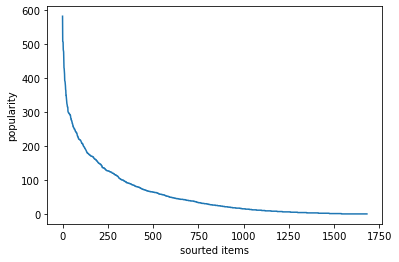

In [8]:
# plt long tail
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(itemrateNumCurrent[::-1])
plt.xlabel("sourted items")
plt.ylabel("popularity")

In [9]:
# Top Pop
ratings = np.zeros((n_user, n_item))

In [10]:
for row in df.itertuples():
    # Pandas(Index=0, user_id=196, item_id=242, rating=3, timestamp=881250949)
    ratings[row[1]-1,row[2]-1] = row[3]
print(ratings)

[[5. 3. 4. ... 0. 0. 0.]
 [4. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [5. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 5. 0. ... 0. 0. 0.]]


In [11]:
ratingNum = ratingNum.sum(axis=0) # the total namber of times an item got rate by all users 
ratingNum

array([452., 131.,  90., ...,   1.,   1.,   1.])

In [12]:
itemRateSum = ratings.sum(axis=0) # the total rating reviced by every items from all user
itemRateSum

array([1753.,  420.,  273., ...,    2.,    3.,    3.])

In [13]:
itemRateAvg = itemRateSum / ratingNum
itemRateAvg

array([3.87831858, 3.20610687, 3.03333333, ..., 2.        , 3.        ,
       3.        ])

In [16]:
i_cols = ['movie id', 'movie title' ,'release date','video release date',
          'IMDb URL', 'unknown', 'Action', 'Adventure', 'Animation',
          'Children\'s', 'Comedy', 'Crime', 'Documentary', 'Drama',
          'Fantasy', 'Film-Noir', 'Horror', 'Musical', 'Mystery',
          'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'] 
items = pd.read_csv('ml-100k/u.item', sep='|', names=i_cols, encoding='latin-1')
items

movie id                                movie title release date  \
0            1                           Toy Story (1995)  01-Jan-1995   
1            2                           GoldenEye (1995)  01-Jan-1995   
2            3                          Four Rooms (1995)  01-Jan-1995   
3            4                          Get Shorty (1995)  01-Jan-1995   
4            5                             Copycat (1995)  01-Jan-1995   
...        ...                                        ...          ...   
1677      1678                          Mat' i syn (1997)  06-Feb-1998   
1678      1679                           B. Monkey (1998)  06-Feb-1998   
1679      1680                       Sliding Doors (1998)  01-Jan-1998   
1680      1681                        You So Crazy (1994)  01-Jan-1994   
1681      1682  Scream of Stone (Schrei aus Stein) (1991)  08-Mar-1996   

      video release date                                           IMDb URL  \
0                    NaN  http://us.imdb.com/M/title-exact?Toy%20Story%2...   
1                    NaN  http://us.imdb.com/M/title-exact?GoldenEye%20(...   
2                    NaN  http://us.imdb.com/M/title-exact?Four%20Rooms%...   
3                    NaN  http://us.imdb.com/M/title-exact?Get%20Shorty%...   
4                    NaN  http://us.imdb.com/M/title-exact?Copycat%20(1995)   
...                  ...                                                ...   
1677                 NaN  http://us.imdb.com/M/title-exact?Mat%27+i+syn+...   
1678                 NaN  http://us.imdb.com/M/title-exact?B%2E+Monkey+(...   
1679                 NaN      http://us.imdb.com/Title?Sliding+Doors+(1998)   
1680                 NaN  http://us.imdb.com/M/title-exact?You%20So%20Cr...   
1681                 NaN  http://us.imdb.com/M/title-exact?Schrei%20aus%...   

      unknown  Action  Adventure  Animation  Children's  ...  Fantasy  \
0           0       0          0          1           1  ...        0   
1           0       1          1          0           0  ...        0   
2           0       0          0          0           0  ...        0   
3           0       1          0          0           0  ...        0   
4           0       0          0          0           0  ...        0   
...       ...     ...        ...        ...         ...  ...      ...   
1677        0       0          0          0           0  ...        0   
1678        0       0          0          0           0  ...        0   
1679        0       0          0          0           0  ...        0   
1680        0       0          0          0           0  ...        0   
1681        0       0          0          0           0  ...        0   

      Film-Noir  Horror  Musical  Mystery  Romance  Sci-Fi  Thriller  War  \
0             0       0        0        0        0       0         0    0   
1             0       0        0        0        0       0         1    0   
2             0       0        0        0        0       0         1    0   
3             0       0        0        0        0       0         0    0   
4             0       0        0        0        0       0         1    0   
...         ...     ...      ...      ...      ...     ...       ...  ...   
1677          0       0        0        0        0       0         0    0   
1678          0       0        0        0        1       0         1    0   
1679          0       0        0        0        1       0         0    0   
1680          0       0        0        0        0       0         0    0   
1681          0       0        0        0        0       0         0    0   

      Western  
0           0  
1           0  
2           0  
3           0  
4           0  
...       ...  
1677        0  
1678        0  
1679        0  
1680        0  
1681        0  

[1682 rows x 24 columns]

In [19]:
top_n = 5
activeUser = 0

maskActiveUser = ratings[activeUser,:]>0
print(maskActiveUser)

itemRateNumCurrent = ratingNum.copy()
itemRateNumCurrent[maskActiveUser] = 0
print(itemRateNumCurrent)

[ True  True  True ... False False False]
[0. 0. 0. ... 1. 1. 1.]


In [20]:
itemSortInd = itemRateNumCurrent.argsort()
itemSortInd

array([  0, 172, 173, ..., 287, 285, 293])

In [22]:
print('movie ID' + '\t movie title')
print(items['movie title'][itemSortInd[:-1 -top_n:-1]])

movie ID	 movie title
293               Liar Liar (1997)
285    English Patient, The (1996)
287                  Scream (1996)
299           Air Force One (1997)
312                 Titanic (1997)
Name: movie title, dtype: object


In [21]:
itemSortInd[:-1 -top_n:-1]

array([293, 285, 287, 299, 312])

In [23]:
itemRateAvgCurrent = itemRateAvg.copy()
itemRateAvgCurrent[maskActiveUser] = 0

itemSortIndAvg = itemRateAvgCurrent.argsort()
print('movie ID' + '\t movie title')
print(items['movie title'][itemSortIndAvg[:-1 -top_n:-1]])

movie ID	 movie title
1535                                 Aiqing wansui (1994)
1652    Entertaining Angels: The Dorothy Day Story (1996)
1200           Marlene Dietrich: Shadow and Light (1996) 
1598                        Someone Else's America (1995)
1121                       They Made Me a Criminal (1939)
Name: movie title, dtype: object


In [24]:
itemSortIndAvg[:-1 -top_n:-1]

array([1535, 1652, 1200, 1598, 1121])